In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
import os
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = ReadoutExperiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:39595
INFO:DRV:      Host server up..............Done 0.06s
INFO:DRV:      Encoding axons/synapses.....Done 14.86s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582298849.44188
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582298849.44188/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c9

INFO:DRV:      Compiling Embedded snips....Done 0.61s
INFO:DRV:      Encoding probes.............Done 5.19ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582298849.44188/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582298849.44188/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.85s
INFO:DRV:      Transferring probes.........Done 0.04s
INFO:DRV:      Configuring registers.......Done 14.51s
INFO:DRV:      Transferring spikes.........Done 0.03s
INFO:HST:  chip=1 cpu=0 Transfered values 20, 135, 30 
INFO:HST:  chip=0 cpu=0 Transfered values 20, 135, 30 
INFO:HST:  chip=1 cpu=0 Reset current/voltage 

INFO:HST:  chip=0 cpu=0 Reset functional state at 2190
INFO:HST:  chip=1 cpu=0 Reset functional state at 2190
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2295 to 2325
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2295 to 2325
INFO:HST:  chip=1 cpu=0 Reset functional state at 2325
INFO:HST:  chip=0 cpu=0 Reset functional state at 2325
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2430 to 2460
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2430 to 2460
INFO:HST:  chip=1 cpu=0 Reset functional state at 2460
INFO:HST:  chip=0 cpu=0 Reset functional state at 2460
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2565 to 2595
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2565 to 2595
INFO:HST:  chip=1 cpu=0 Reset functional state at 2595
INFO:HST:  chip=0 cpu=0 Reset functional state at 2595
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2700 to 2730
INFO:HST:  chip=0 cpu=0 Reset current/volt

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


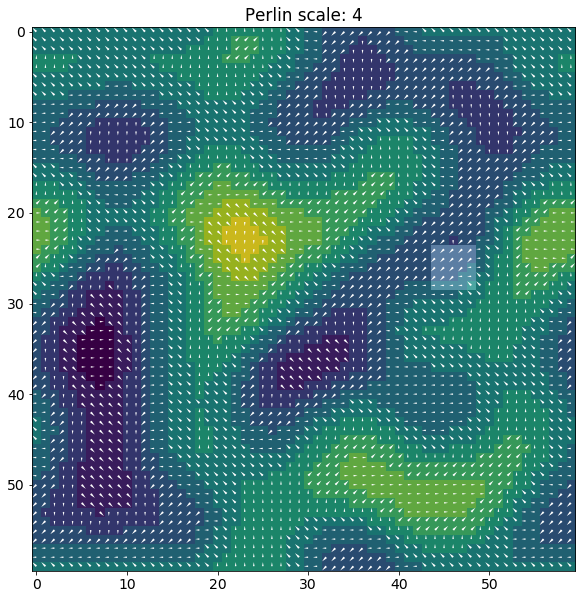

In [5]:
exp.net.plot.landscape()

In [6]:
#p = exp.net.exVoltageProbes[0].plot()

In [7]:
#p = exp.net.inVoltageProbes[0].plot()

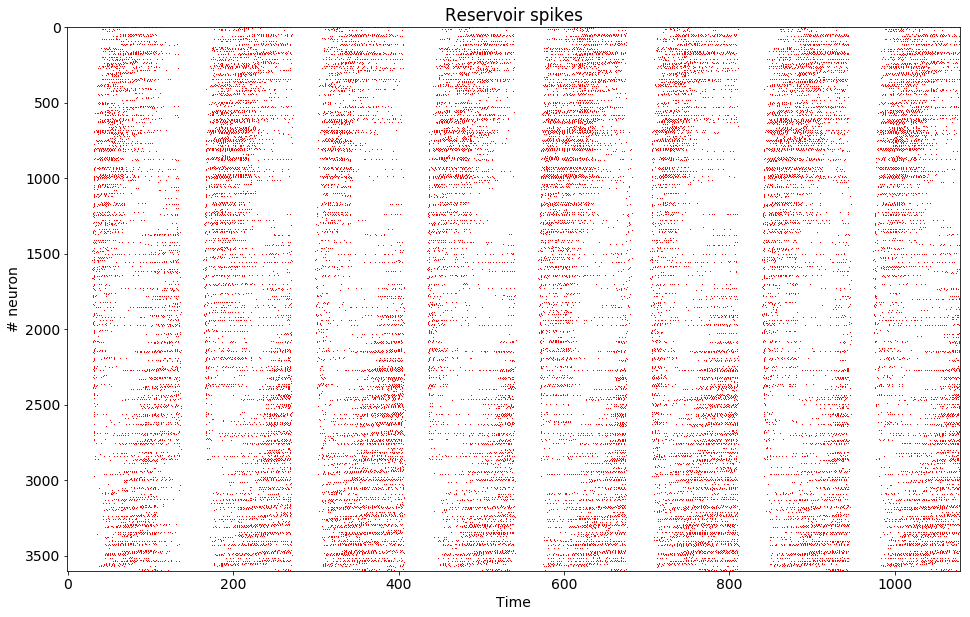

In [8]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=1080)

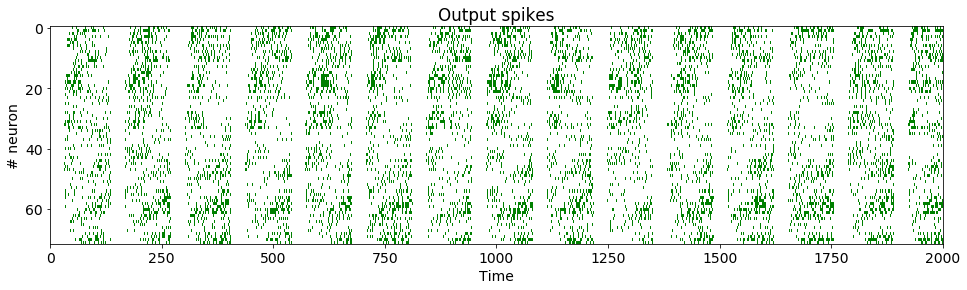

In [9]:
exp.net.plot.outputSpikeTrain(fr=0,to=2000)

In [10]:
offset = exp.p.breakSteps + exp.p.cueSteps + exp.p.cueRelaxation
data = []
for i in range(exp.p.trials):
    fr, to = (i+1)*offset+i*exp.p.movementSteps, (i+1)*offset+(i+1)*exp.p.movementSteps
    #data.append(exp.net.outSpikeTrains[:,fr:to])
    data.append(exp.net.exSpikeTrains[:,fr:to])
    #data.append(exp.net.outVoltageTrains[:,fr:to])
data = np.array(data)

data.shape

(25, 3600, 100)

(0, 700)

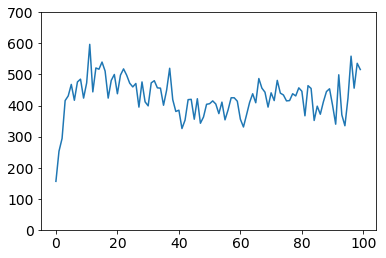

In [11]:
diff01 = np.abs(data[0] - data[2])
p = plt.plot(np.sum(diff01, axis=0))
plt.ylim(0,700)

#plt.figure(figsize=(16, 16))
#p = plt.imshow(diff01)

In [12]:
data.shape[0]

25

In [13]:
binSize = 20
bins = np.array([np.mean(data[:, :, i:i+binSize], axis=2) for i in range(0,data.shape[2],binSize)])
bins.shape  # time, trials, neurons

(5, 25, 3600)

In [14]:
difs = []
for i in range(1,16):
    dif = np.abs(bins[:,i,:] - bins[:,i+1,:])
    difs.append(dif)
difs = np.array(difs)
    
dif_mean = np.sum(difs, axis=(0,2))/3600
dif_sd = np.std(difs, axis=(0,2))

#p = plt.errorbar(dif_mean, yerr=dif_sd)

In [15]:
trial = data[0]
trial.shape

(3600, 100)

In [16]:
act = np.array([np.mean(trial[:,i:i+binSize], axis=1) for i in range(0,200,binSize)])
act.shape

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(10, 3600)

In [17]:
#for i in range(20):
#    act0 = act[i,:].reshape(60,60)
#    plt.imshow(act0)
#    plt.show()

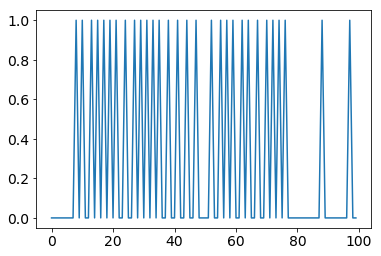

In [18]:
p = plt.plot(data[0,8])

In [19]:
#tgt = np.arange(200)/10000
#tgt = np.cumsum(np.random.normal(size=200))
#plt.plot(tgt)

In [20]:
#from scipy.signal import savgol_filter
#yhat = savgol_filter(ye, 51, 1)

#plt.plot(yhat)
#plt.plot(target)

In [21]:
#print(data.shape)
#print(target.shape)

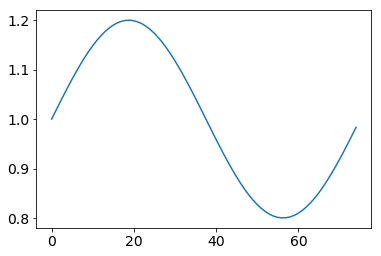

In [43]:
target = 1.0+0.2*np.sin((np.pi/(0.5*s))*np.arange(s))
plt.plot(target)

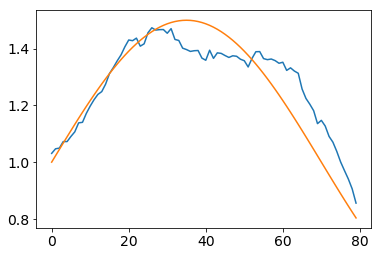

In [48]:
import statsmodels.api as sm
import time

target = 1.0+0.5*np.sin((np.pi/(0.3*s))*np.arange(s))
[t,n,s] = data.shape
binSize = 20

yes = []
t0 = time.time()
for i in range(s-binSize):
    # Fit
    x = np.mean(data[:24,:,i:i+binSize], axis=2)
    y = np.tile(target[i], 24)
    model = sm.OLS(y, x)
    params = model.fit().params
    # Predict
    xe = np.mean(data[24,:,i:i+binSize], axis=1)
    ye = np.dot(xe.T, params)
    yes.append(ye)
    
    t1 = time.time()
    print("{}/{}, t = {}".format(i+1, s-binSize, np.round(t1-t0,2)), end="\r")
yes = np.array(yes)

plt.plot(yes)
plt.plot(target[:-binSize])
#plt.xlim((0,100))
#plt.ylim((0,0.04))
plt.savefig(exp.net.plot.plotDir + 'output_prediction.' + exp.p.pltFileType)
p = plt.show()

Parameters set to zero: 348


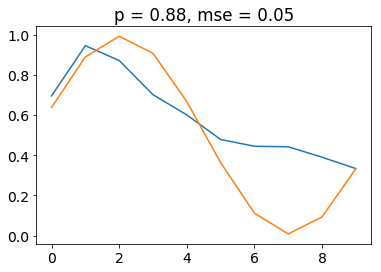

In [23]:
target = exp.targetFunction
[t,n,s] = data.shape

alpha = 0 #0.1 #0.001
l1w= 0 #0.0005
filter = "bins"
binSize = 10

(params, ye, performance) = utils.trainOLS(data[:24], data[24], target, alpha=alpha, l1w=l1w, filter=filter, binSize=binSize)

print('Parameters set to zero: {}'.format(len(params[params==0])))

plt.title("p = "+str(np.round(performance.cor, 2))+", mse = "+str(np.round(performance.mse, 2)))
plt.plot(ye)
#plt.plot(tgt)
plt.plot(np.array([np.mean(target[i:i+binSize]) for i in range(0,len(target),binSize)]))
p = plt.show()

In [24]:
import os
dirPath = os.getcwd()
#dirPath
#np.save(dirPath+'/data_2020-02-06_19-10.npy', data)

In [25]:
binSize = 10

dtrans = []
for i in range(data.shape[0]):
    dataBinned = np.array([np.mean(data[i, :, j:j+binSize], axis=1) for j in range(0,data[i].shape[1],binSize)])
    (d, evals, evecs) = utils.pca(dataBinned.astype(float), dims_rescaled_data=1)
    dtrans.append(d)

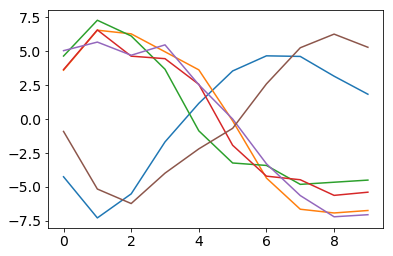

In [31]:
plt.plot(dtrans[0])
plt.plot(dtrans[1])
plt.plot(dtrans[2])
plt.plot(dtrans[3])
plt.plot(dtrans[4])
plt.plot(dtrans[10])

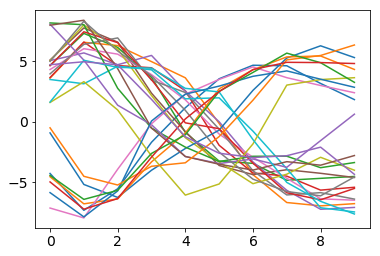

In [32]:
#for i in range(data.shape[0]):

for i in range(25):
    plt.plot(dtrans[i])

In [28]:
#import subprocess
#subprocess.call(shlex.split("jupyter nbconvert notebook.ipynb --to pdf"))